# Explore here

In [78]:
import pandas as pd 

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
total_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [79]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [80]:
total_data.drop_duplicates()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [81]:
glucose_stats = total_data["Glucose"].describe()
glucose_stats

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

In [82]:
glucose_iqr = glucose_stats["75%"] - glucose_stats["25%"]
upper_limit = glucose_stats["75%"] + 1.5 * glucose_iqr
lower_limit = glucose_stats["25%"] - 1.5 * glucose_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(glucose_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 202.12 y 37.12, con un rango intercuartílico de 41.25


In [83]:
total_data = total_data[total_data["Glucose"] > 0]
total_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [84]:
BloodPressure_stats = total_data["BloodPressure"].describe()
BloodPressure_stats

count    763.000000
mean      69.115334
std       19.399240
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [85]:
BloodPressure_iqr = BloodPressure_stats["75%"] - BloodPressure_stats["25%"]
upper_limit = BloodPressure_stats["75%"] + 1.5 * BloodPressure_iqr
lower_limit = BloodPressure_stats["25%"] - 1.5 * BloodPressure_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(BloodPressure_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 107.0 y 35.0, con un rango intercuartílico de 18.0


In [86]:
total_data = total_data[total_data["BloodPressure"] > 35]
total_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [87]:
SkinThickness_stats = total_data["SkinThickness"].describe()
SkinThickness_stats

count    725.000000
mean      21.340690
std       15.731292
min        0.000000
25%        0.000000
50%       24.000000
75%       33.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [88]:
SkinThickness_iqr = SkinThickness_stats["75%"] - SkinThickness_stats["25%"]
upper_limit = SkinThickness_stats["75%"] + 1.5 * SkinThickness_iqr
lower_limit = SkinThickness_stats["25%"] - 1.5 * SkinThickness_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(SkinThickness_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 82.5 y -49.5, con un rango intercuartílico de 33.0


In [89]:
total_data = total_data[total_data["SkinThickness"] > 0]
total_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [90]:
Insulin_stats = total_data["Insulin"].describe()
Insulin_stats

count    531.000000
mean     114.983051
std      123.158181
min        0.000000
25%        0.000000
50%       91.000000
75%      165.500000
max      846.000000
Name: Insulin, dtype: float64

In [91]:
Insulin_iqr = Insulin_stats["75%"] - Insulin_stats["25%"]
upper_limit = Insulin_stats["75%"] + 1.5 * Insulin_iqr
lower_limit = Insulin_stats["25%"] - 1.5 * Insulin_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(Insulin_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 413.75 y -248.25, con un rango intercuartílico de 165.5


In [92]:
total_data = total_data[total_data["Insulin"] > 0]
total_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


In [93]:
BMI_stats = total_data["BMI"].describe()
BMI_stats

count    390.000000
mean      32.932564
std        7.131471
min        0.000000
25%       28.400000
50%       33.200000
75%       36.975000
max       67.100000
Name: BMI, dtype: float64

In [94]:
BMI_iqr = BMI_stats["75%"] - BMI_stats["25%"]
upper_limit = BMI_stats["75%"] + 1.5 * BMI_iqr
lower_limit = BMI_stats["25%"] - 1.5 * BMI_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(BMI_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 49.84 y 15.54, con un rango intercuartílico de 8.58


In [95]:
total_data = total_data[total_data["BMI"] > 0]
total_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


In [96]:
from sklearn.model_selection import train_test_split

X = total_data.drop("Outcome", axis = 1)
y = total_data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [97]:
from sklearn.feature_selection import SelectKBest

selection_model = SelectKBest(k= 7)
selection_model.fit(X_train, y_train)

SelectKBest(k=7)

In [98]:
selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_test_sel.head()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.0,77.0,30.0,56.0,33.3,1.251,24.0
1,4.0,144.0,28.0,140.0,29.5,0.287,37.0
2,9.0,152.0,34.0,171.0,34.2,0.893,33.0
3,6.0,93.0,30.0,64.0,28.7,0.356,23.0
4,1.0,140.0,26.0,180.0,24.1,0.828,23.0


In [99]:
X_test_sel.head()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.0,77.0,30.0,56.0,33.3,1.251,24.0
1,4.0,144.0,28.0,140.0,29.5,0.287,37.0
2,9.0,152.0,34.0,171.0,34.2,0.893,33.0
3,6.0,93.0,30.0,64.0,28.7,0.356,23.0
4,1.0,140.0,26.0,180.0,24.1,0.828,23.0


In [100]:
X_train_sel["Outcome"] = y_train.values
X_test_sel["Outcome"] = y_test.values
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

In [101]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")
train_data

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.0,100.0,26.0,50.0,30.8,0.597,21.0,0
1,0.0,97.0,36.0,100.0,36.8,0.600,25.0,0
2,7.0,136.0,26.0,135.0,26.0,0.647,51.0,0
3,12.0,151.0,40.0,271.0,41.8,0.742,38.0,1
4,2.0,121.0,32.0,95.0,39.1,0.886,23.0,0
...,...,...,...,...,...,...,...,...
306,1.0,153.0,42.0,485.0,40.6,0.687,23.0,0
307,1.0,100.0,15.0,56.0,23.6,0.666,26.0,0
308,1.0,86.0,52.0,65.0,41.3,0.917,29.0,0
309,0.0,95.0,39.0,105.0,44.6,0.366,22.0,0


In [102]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

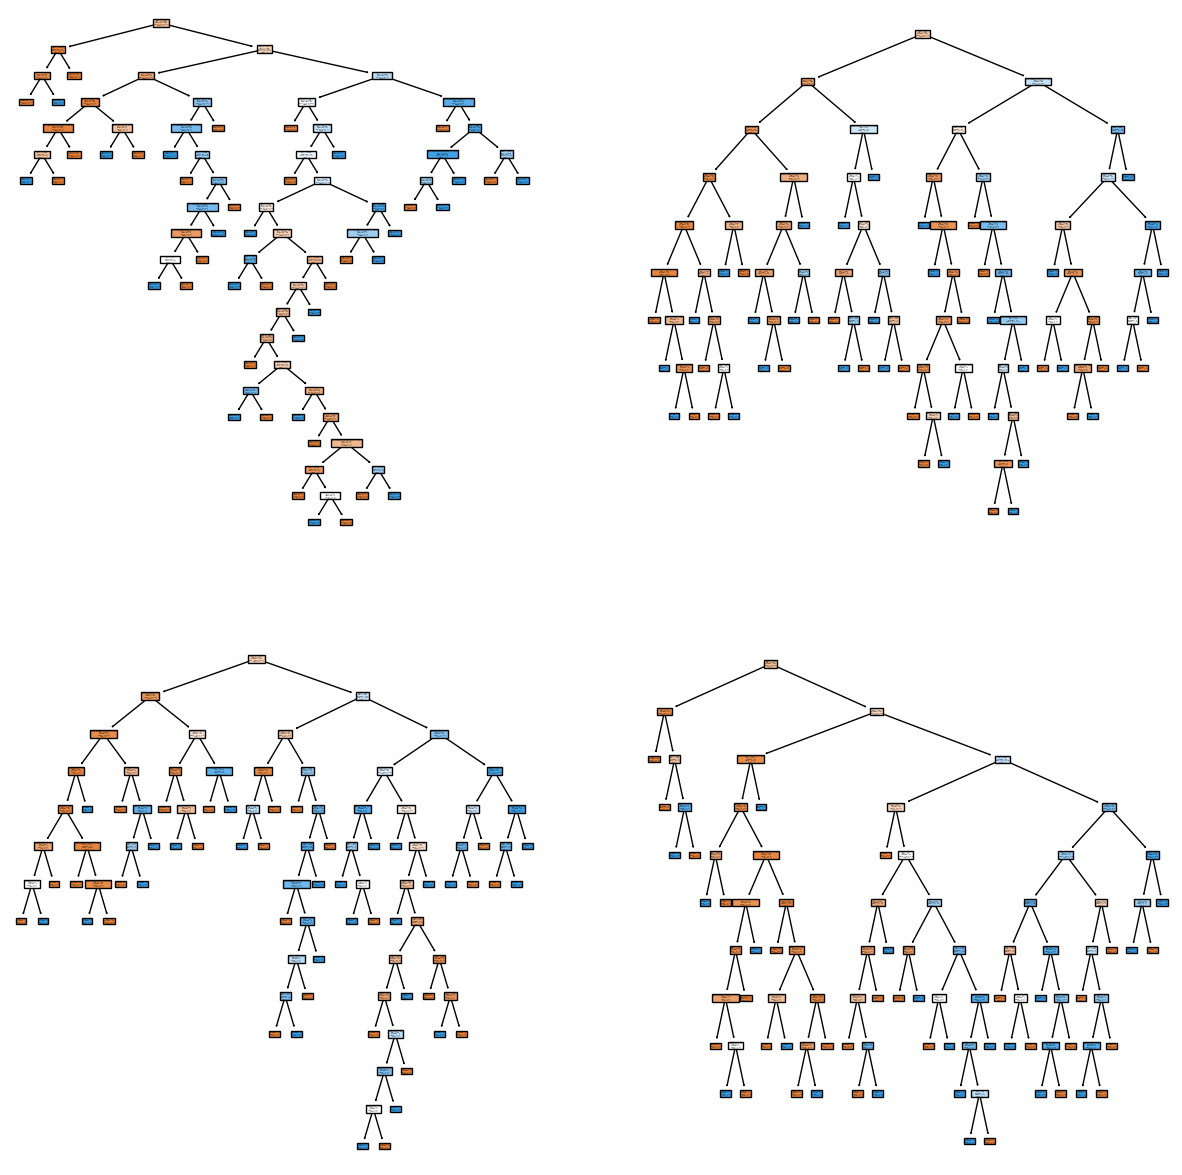

In [103]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# Mostramos los 4 primeros árboles de los 100 generados (por defecto)
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [104]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0])

In [105]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7435897435897436

In [106]:
from sklearn.metrics import mean_squared_error

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")

Error cuadrático medio: 0.2564102564102564


In [107]:
from pickle import dump

dump(model, open("random_forest_classifier_default_42.sav", "wb"))